# Project Name - Cardiovascular Risk Prediction

**Project Type** - Classification

**Contribution** - Individual

# Project Summary

# Github Link

# Problem Statement

## Business Problem Overview

# 1. Know Your Data

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# 1. Dataset Loading
df = pd.read_csv('data_cardiovascular_risk.csv')

### Making copy of Raw Data

In [3]:
# 2. Making copy of Raw Data
df_raw = df.copy()

It's a good practice to make a copy of the original data before making any changes. This way, the original data remains unchanged, and we can refer back to it if needed. So in this step, we're creating a new DataFrame (df) that's a copy of the original DataFrame (df_raw).

### Dataset First View

In [4]:
# 3. Dataset First View
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


This code displays the first 5 rows of the DataFrame. This is useful to get a sense of what the data looks like. From this output, we can see the names of the columns and some of the values in those columns.

In [5]:
# Dataset Last
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


Similar to the previous step, this code displays the last 5 rows of the DataFrame. This can be useful to see if there are any issues with the data at the end of the dataset.

### Dataset Rows & Columns count

In [6]:
# 4. Dataset Rows & Columns count
rows, columns = df.shape


This code is checking the number of rows and columns in the DataFrame. The output shows that there are 8760 rows and 14 columns. This means there are 8760 records in the dataset and 14 different types of information recorded for each observation.

### Dataset Information

In [7]:
# 5. Dataset Information
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset has 3390 rows (entries) and 17 columns (variables).

The dataset information is as follows:

id: 3390 non-null values, integer type

age: 3390 non-null values, integer type

education: 3303 non-null values, float type

sex: 3390 non-null values, object type

is_smoking: 3390 non-null values, object type

cigsPerDay: 3368 non-null values, float type

BPMeds: 3346 non-null values, float type

prevalentStroke: 3390 non-null values, integer type

prevalentHyp: 3390 non-null values, integer type

diabetes: 3390 non-null values, integer type

totChol: 3352 non-null values, float type

sysBP: 3390 non-null values, float type

diaBP: 3390 non-null values, float type

BMI: 3376 non-null values, float type

heartRate: 3389 non-null values, float type

glucose: 3086 non-null values, float type

TenYearCHD: 3390 non-null values, integer type

### Duplicate Values

In [8]:
# 6. Duplicate Values
duplicate_values = df.duplicated().sum()

There are no duplicate values in the dataset.

### Missing Values/Null Values

In [9]:
# 7. Missing Values/Null Values
missing_values = df.isnull().sum()

Here are the missing values for each column:

id: 0 missing values

age: 0 missing values

education: 87 missing values

sex: 0 missing values

is_smoking: 0 missing values

cigsPerDay: 22 missing values

BPMeds: 44 missing values

prevalentStroke: 0 missing values

prevalentHyp: 0 missing values

diabetes: 0 missing values

totChol: 38 missing values

sysBP: 0 missing values

diaBP: 0 missing values

BMI: 14 missing values

heartRate: 1 missing value

glucose: 304 missing values

TenYearCHD: 0 missing values

It seems that the glucose column has the most missing values. Depending on the nature of your analysis, you might need to impute these missing values or exclude these records from your dataset.

# 2. Understanding Your Variables

### Columns in the Data

In [10]:
# Dataset Columns
columns = df.columns.tolist()

Dataset Columns: The dataset includes the following columns:

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

### Description of the Data

In [64]:
# Dataset Describe
describe = df.describe(include='all')
describe

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Dataset Describe: The dataset description provides a statistical summary of all columns. For numerical columns, it gives the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. For categorical columns, it gives the count, unique, top, and frequency.

### Number of Numerical and Categorical Variables

In [12]:
# Number of Numerical and Categorical Variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

Number of Numerical Variables: The dataset includes the following numerical variables:
['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

Number of Categorical Variables: The dataset includes the following categorical variables:
['sex', 'is_smoking']

### Check Unique Values for each variable

In [15]:
# Step 11: Checking unique values for each variable
unique_values = df.nunique()
unique_values


id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

Binary categorical variables (e.g., sex, is_smoking, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD) have 2 unique values.
education seems to be an ordinal categorical variable with 4 unique values.

Continuous numerical variables like age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, and glucose have a wide range of unique values.

# 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Numerical Variables Distribution

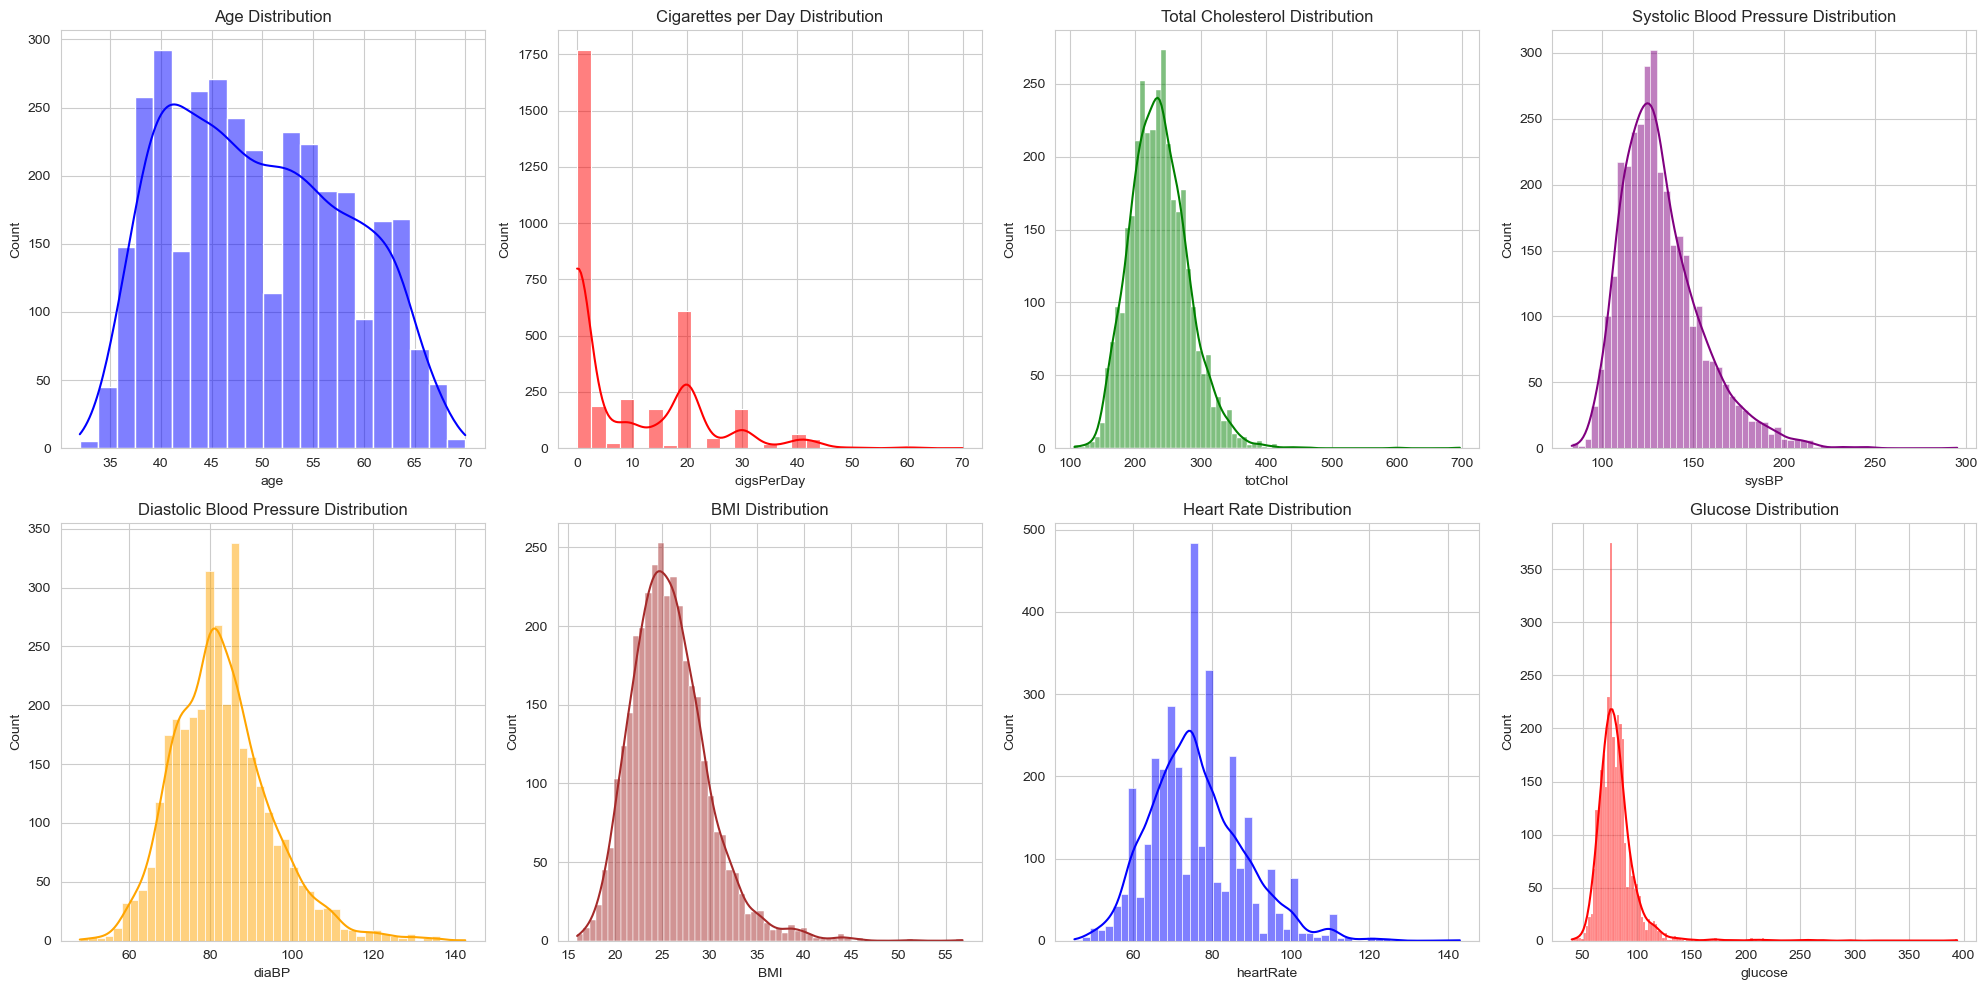

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set_style("whitegrid")

# Numerical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'age'
sns.histplot(data=df, x='age', kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plotting 'cigsPerDay'
sns.histplot(data=df, x='cigsPerDay', kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Cigarettes per Day Distribution')

# Plotting 'totChol'
sns.histplot(data=df, x='totChol', kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Total Cholesterol Distribution')

# Plotting 'sysBP'
sns.histplot(data=df, x='sysBP', kde=True, color='purple', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Blood Pressure Distribution')

# Plotting 'diaBP'
sns.histplot(data=df, x='diaBP', kde=True, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure Distribution')

# Plotting 'BMI'
sns.histplot(data=df, x='BMI', kde=True, color='brown', ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution')

# Plotting 'heartRate'
sns.histplot(data=df, x='heartRate', kde=True, color='blue', ax=axes[1, 2])
axes[1, 2].set_title('Heart Rate Distribution')

# Plotting 'glucose'
sns.histplot(data=df, x='glucose', kde=True, color='red', ax=axes[1, 3])
axes[1, 3].set_title('Glucose Distribution')

plt.tight_layout()
plt.show()

The above plots show the distribution of the numerical variables in our dataset.

Age Distribution: The distribution is slightly skewed to the right, indicating that there are more younger people in the dataset than older people.

Cigarettes per Day Distribution: The distribution is heavily skewed to the right, indicating that most people in the dataset smoke few or no cigarettes per day.

Total Cholesterol Distribution: The distribution seems to be approximately normal, with a slight skew to the right. Most people in the dataset have total cholesterol levels around the mean.

Systolic Blood Pressure Distribution: The distribution is slightly skewed to the right, meaning that most people have systolic blood pressure around or below the mean.

Diastolic Blood Pressure Distribution: The distribution is slightly skewed to the right, similar to systolic blood pressure. Most people have diastolic blood pressure around or below the mean.

BMI Distribution: The distribution is slightly skewed to the right, meaning that most people have a BMI around or below the mean.

Heart Rate Distribution: The distribution seems to be approximately normal, indicating that most people have a heart rate around the mean.

Glucose Distribution: The distribution is skewed to the right, indicating that most people have glucose levels around or below the mean.

### Categorical variable distribution

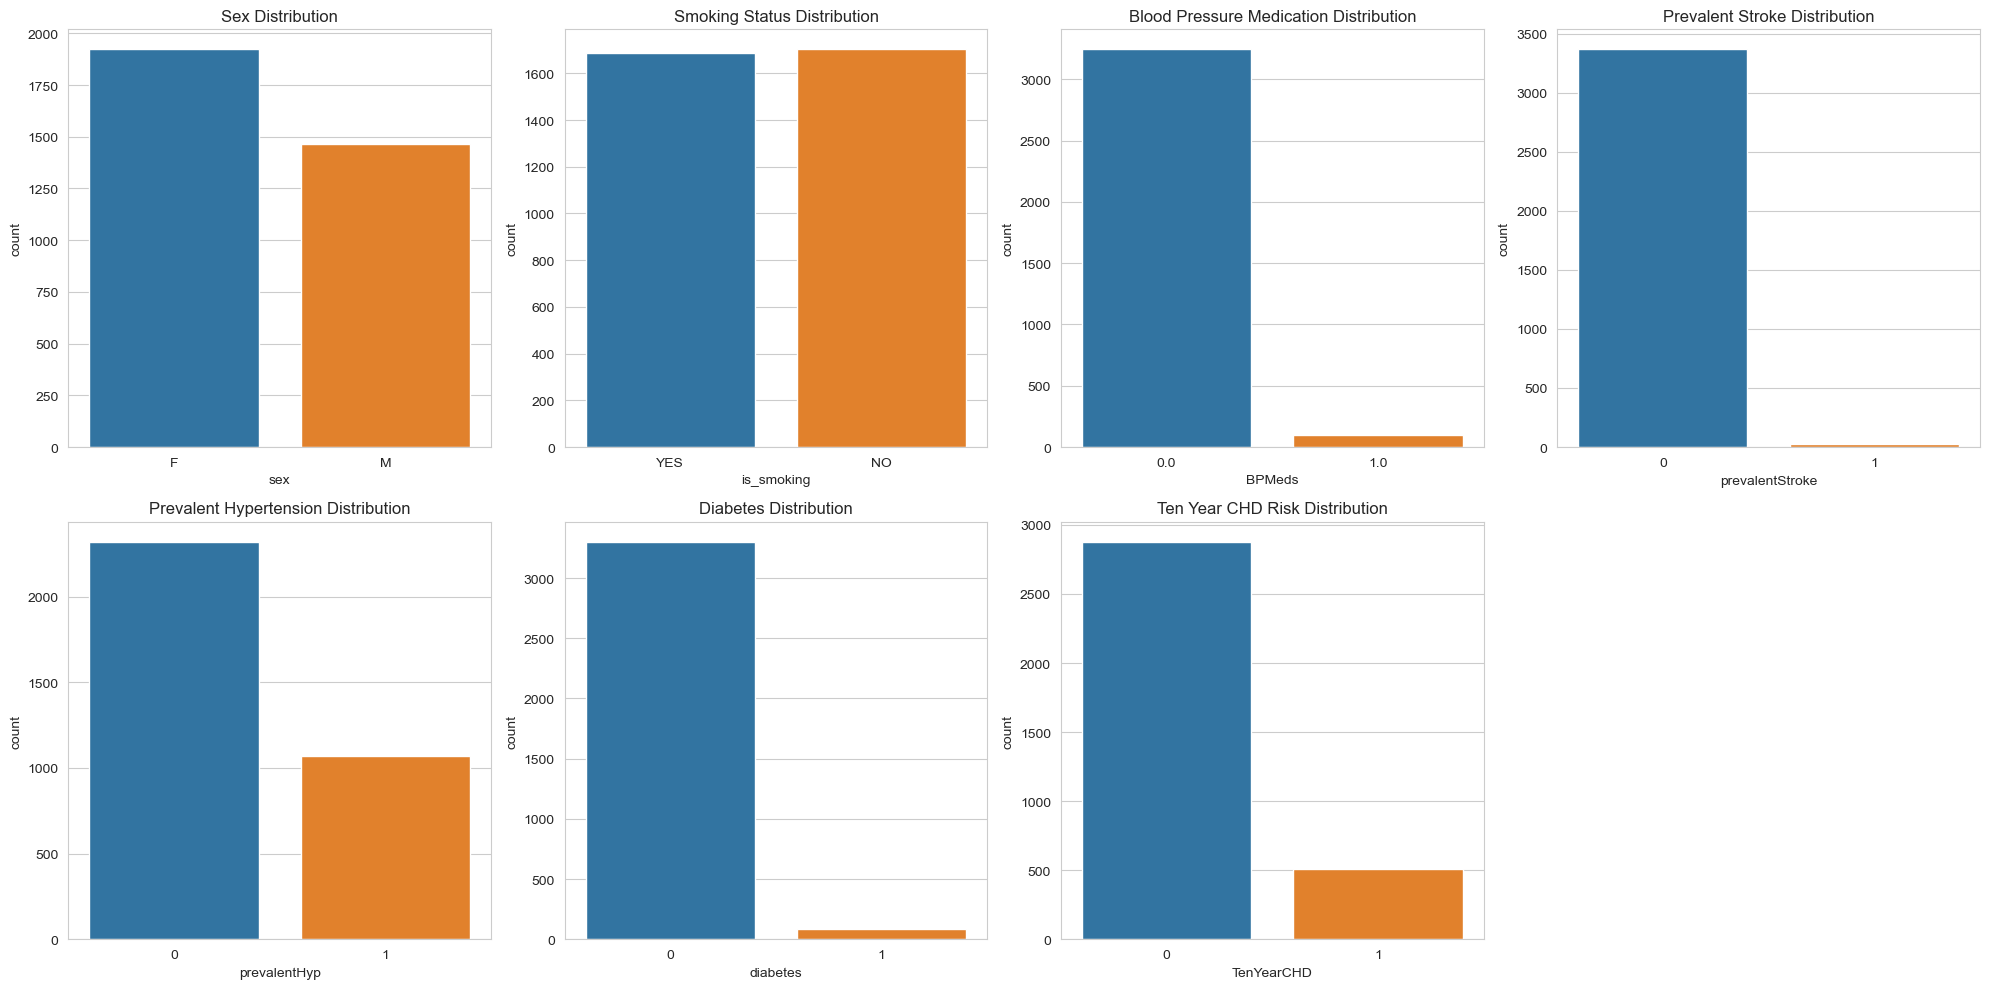

In [17]:
# Categorical Variables Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'sex'
sns.countplot(data=df, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Sex Distribution')

# Plotting 'is_smoking'
sns.countplot(data=df, x='is_smoking', ax=axes[0, 1])
axes[0, 1].set_title('Smoking Status Distribution')

# Plotting 'BPMeds'
sns.countplot(data=df, x='BPMeds', ax=axes[0, 2])
axes[0, 2].set_title('Blood Pressure Medication Distribution')

# Plotting 'prevalentStroke'
sns.countplot(data=df, x='prevalentStroke', ax=axes[0, 3])
axes[0, 3].set_title('Prevalent Stroke Distribution')

# Plotting 'prevalentHyp'
sns.countplot(data=df, x='prevalentHyp', ax=axes[1, 0])
axes[1, 0].set_title('Prevalent Hypertension Distribution')

# Plotting 'diabetes'
sns.countplot(data=df, x='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Diabetes Distribution')

# Plotting 'TenYearCHD'
sns.countplot(data=df, x='TenYearCHD', ax=axes[1, 2])
axes[1, 2].set_title('Ten Year CHD Risk Distribution')

fig.delaxes(axes[1][3])  # Delete empty subplot

plt.tight_layout()
plt.show()

The above plots show the distribution of the categorical variables in our dataset.

Sex Distribution: There are more females (represented by 0) than males (represented by 1) in the dataset.

Smoking Status Distribution: Most individuals in the dataset are non-smokers (represented by 0).

Blood Pressure Medication Distribution: The vast majority of individuals are not taking blood pressure medication (represented by 0).

Prevalent Stroke Distribution: Very few individuals have had a stroke (represented by 1).

Prevalent Hypertension Distribution: Most individuals do not have hypertension (represented by 0), but a significant number do have it.

Diabetes Distribution: Very few individuals have diabetes (represented by 1).

Ten Year CHD Risk Distribution: Most individuals are not at risk of coronary heart disease in the next ten years (represented by 0), but a significant number are.

### Studying Target feature vs Input features

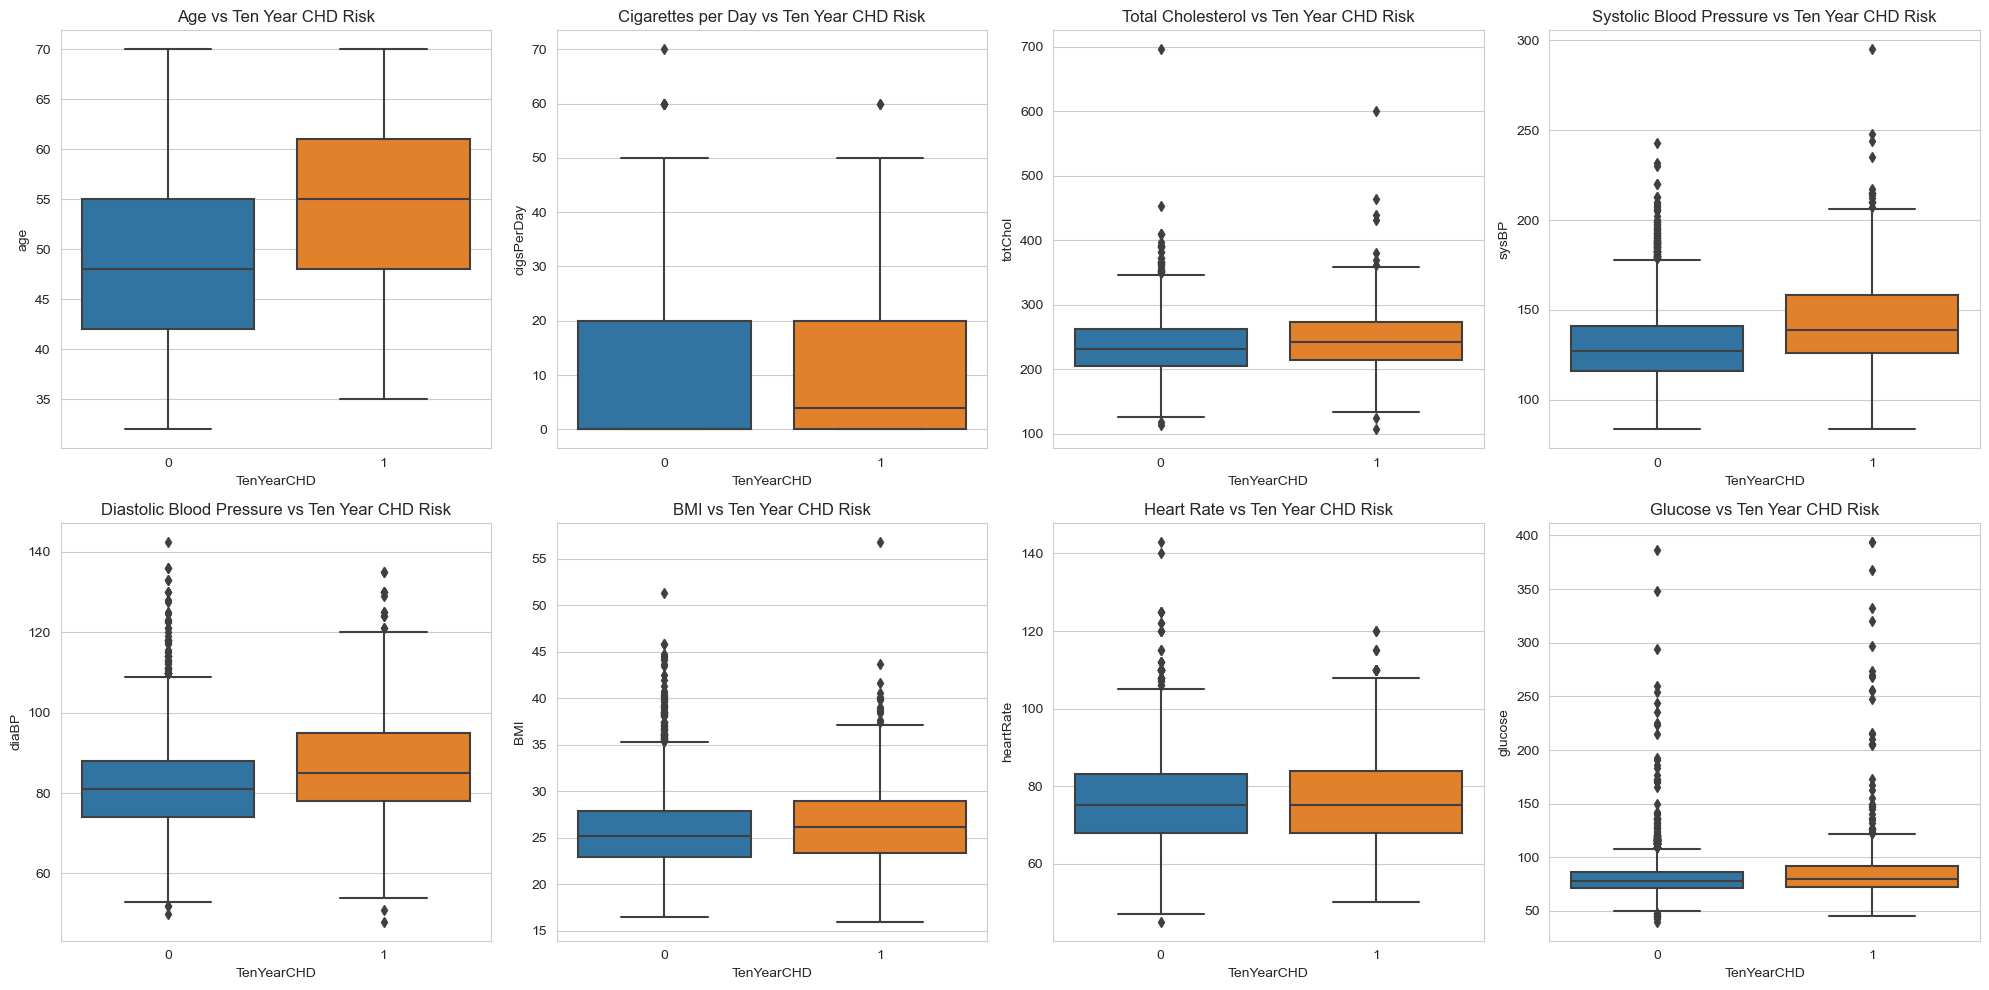

In [18]:
# Studying Target feature vs Input features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plotting 'age'
sns.boxplot(data=df, x='TenYearCHD', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Ten Year CHD Risk')

# Plotting 'cigsPerDay'
sns.boxplot(data=df, x='TenYearCHD', y='cigsPerDay', ax=axes[0, 1])
axes[0, 1].set_title('Cigarettes per Day vs Ten Year CHD Risk')

# Plotting 'totChol'
sns.boxplot(data=df, x='TenYearCHD', y='totChol', ax=axes[0, 2])
axes[0, 2].set_title('Total Cholesterol vs Ten Year CHD Risk')

# Plotting 'sysBP'
sns.boxplot(data=df, x='TenYearCHD', y='sysBP', ax=axes[0, 3])
axes[0, 3].set_title('Systolic Blood Pressure vs Ten Year CHD Risk')

# Plotting 'diaBP'
sns.boxplot(data=df, x='TenYearCHD', y='diaBP', ax=axes[1, 0])
axes[1, 0].set_title('Diastolic Blood Pressure vs Ten Year CHD Risk')

# Plotting 'BMI'
sns.boxplot(data=df, x='TenYearCHD', y='BMI', ax=axes[1, 1])
axes[1, 1].set_title('BMI vs Ten Year CHD Risk')

# Plotting 'heartRate'
sns.boxplot(data=df, x='TenYearCHD', y='heartRate', ax=axes[1, 2])
axes[1, 2].set_title('Heart Rate vs Ten Year CHD Risk')

# Plotting 'glucose'
sns.boxplot(data=df, x='TenYearCHD', y='glucose', ax=axes[1, 3])
axes[1, 3].set_title('Glucose vs Ten Year CHD Risk')

plt.tight_layout()
plt.show()

The above plots show the distribution of numerical variables separated by the categories of the target variable 'TenYearCHD'. The orange boxes represent individuals at risk of coronary heart disease (CHD) in the next ten years, while the blue boxes represent individuals not at risk.

Age vs Ten Year CHD Risk: The median age of individuals at risk of CHD is higher than those not at risk. The interquartile range (the range between the 25th and 75th percentile, represented by the box) also doesn't overlap much, indicating that age could be a strong predictor of CHD risk.

Cigarettes per Day vs Ten Year CHD Risk: The distributions for smokers and non-smokers seem quite similar. However, the upper whisker for smokers is higher, indicating that heavy smokers are at a higher risk of CHD.

Total Cholesterol vs Ten Year CHD Risk: The median total cholesterol level seems slightly higher for individuals at risk of CHD. However, the distributions overlap significantly.

Systolic Blood Pressure vs Ten Year CHD Risk: The median systolic blood pressure is noticeably higher for individuals at risk of CHD, and the interquartile ranges don't overlap much. This suggests that systolic blood pressure could be a strong predictor of CHD risk.

Diastolic Blood Pressure vs Ten Year CHD Risk: Similar to systolic blood pressure, the median diastolic blood pressure is higher for individuals at risk of CHD. However, the distributions overlap more than for systolic blood pressure.

BMI vs Ten Year CHD Risk: The distributions for individuals at risk and not at risk of CHD overlap significantly, suggesting that BMI might not be a strong predictor of CHD risk.

Heart Rate vs Ten Year CHD Risk: The distributions for heart rate are very similar for both groups, suggesting that heart rate might not be a strong predictor of CHD risk.

Glucose vs Ten Year CHD Risk: The median glucose level is slightly higher for individuals at risk of CHD, but the distributions overlap significantly.

### Correlation Matrix

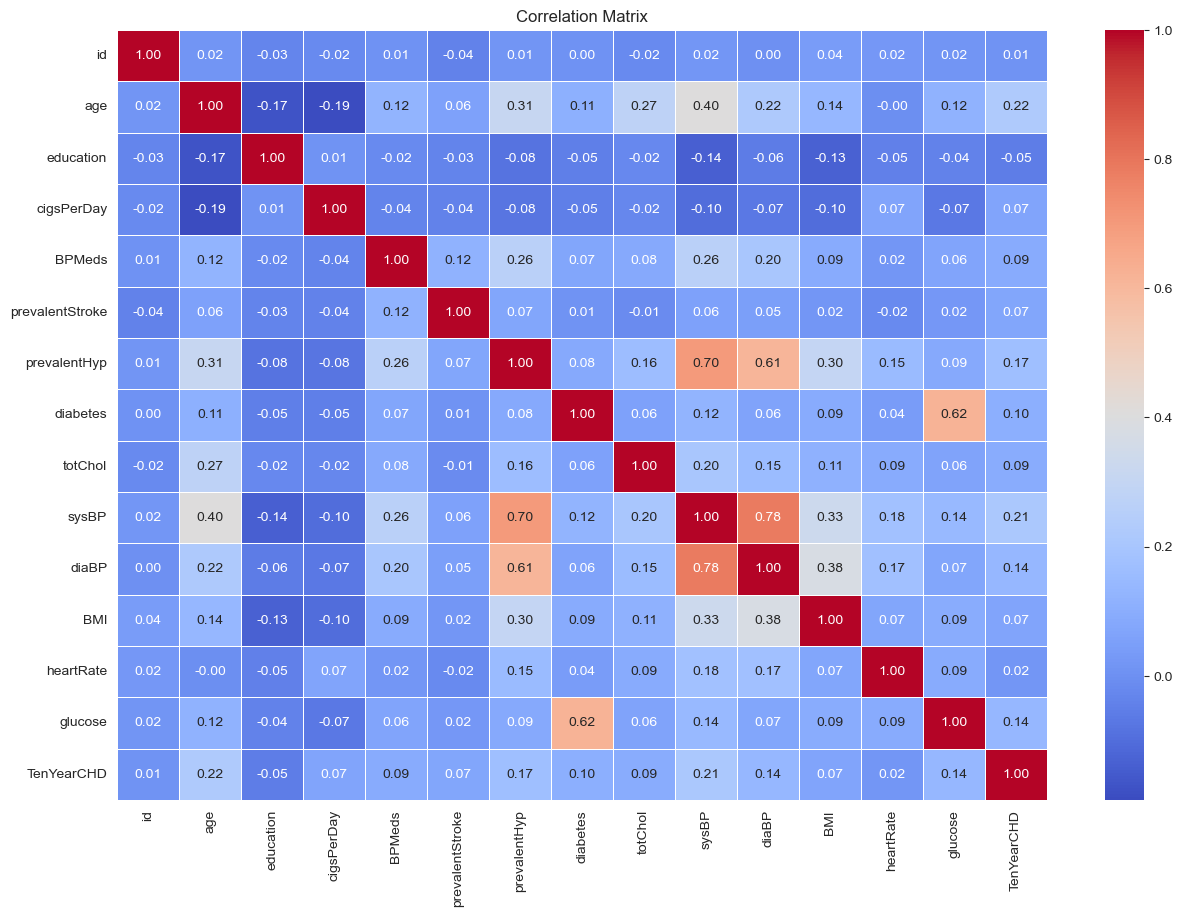

In [19]:
# Correlation Matrix
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

There are strong positive correlations between sysBP (systolic blood pressure) and diaBP (diastolic blood pressure), indicating that they tend to increase together.

Age shows moderate positive correlations with several variables, such as sysBP, prevalentHyp, and the target variable TenYearCHD.
Some variables, such as BPMeds and glucose, are positively correlated with diabetes.

### VIF Analysis

In [21]:
# VIF Analysis

# Selecting only numerical features for VIF calculation
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'TenYearCHD'])

# Dropping rows with NaN values to calculate VIF (VIF calculation doesn't handle NaN values)
numerical_features = numerical_features.dropna()

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data.sort_values(by="VIF", ascending=False)


,feature,VIF
8,sysBP,133.272905
9,diaBP,128.947663
10,BMI,43.729732
0,age,40.699720
11,heartRate,37.308999
7,totChol,31.423041
12,glucose,19.500705
1,education,4.648688
5,prevalentHyp,2.380715
2,cigsPerDay,1.633571


sysBP (systolic blood pressure) and diaBP (diastolic blood pressure) have very high VIF values, indicating strong multicollinearity with other variables. This is expected, as blood pressure metrics are often correlated with other health indicators.

Other variables like BMI, age, heartRate, totChol, and glucose have high VIF values as well, suggesting multicollinearity.


# 4. Hypothesis Testing

### Hypothesis 1:

Hypothesis 1: Comparison of Systolic Blood Pressure between Smokers and Non-Smokers

Why this Hypothesis?

Understanding the effect of smoking on blood pressure can provide insights into cardiovascular health risks.

Null Hypothesis (H0): The mean systolic blood pressure (sysBP) is the same for smokers and non-smokers.
Alternate Hypothesis (HA): The mean systolic blood pressure (sysBP) is different for smokers and non-smokers.

Statistical Test: Independent Samples t-test

Why this Test?

The t-test is used to compare the means of two independent groups. Since we are comparing systolic blood pressure between two independent groups (smokers and non-smokers), the t-test is suitable. We assume that the variable is approximately normally distributed within each group.

In [23]:
from scipy.stats import ttest_ind

# Separating systolic blood pressure for smokers and non-smokers
sysBP_smokers = df[df['is_smoking'] == 'YES']['sysBP'].dropna()
sysBP_non_smokers = df[df['is_smoking'] == 'NO']['sysBP'].dropna()

# Performing the independent samples t-test
t_statistic_sysBP, p_value_sysBP = ttest_ind(sysBP_smokers, sysBP_non_smokers)

p_value_sysBP


1.504067437601882e-17

The p-value for the comparison of systolic blood pressure between smokers and non-smokers is approximately 1.50×10−17

Since the p-value is significantly less than the common significance level of 0.05, we reject the null hypothesis. This means that there is strong evidence to suggest that the mean systolic blood pressure is different between smokers and non-smokers.

### Hypothesis 2:

Hypothesis 2: Association between Gender and Smoking Status

Why this Hypothesis?

Exploring the association between gender and smoking status can reveal social and behavioral patterns related to health.

Null Hypothesis (H0): There is no association between gender (sex) and smoking status (is_smoking).

Alternate Hypothesis (HA): There is an association between gender (sex) and smoking status (is_smoking).

Statistical Test: Chi-Square Test of Independence

Why this Test?

The Chi-Square Test of Independence is used to test the relationship between two categorical variables. Since both gender and smoking status are categorical variables, this test is appropriate.

In [24]:
from scipy.stats import chi2_contingency

# Creating a contingency table for gender and smoking status
contingency_table_gender_smoking = pd.crosstab(df['sex'], df['is_smoking'])

# Performing the Chi-Square Test of Independence
chi2_statistic_gender_smoking, p_value_gender_smoking, _, _ = chi2_contingency(contingency_table_gender_smoking)

p_value_gender_smoking


6.444677278715938e-36

Since the p-value is significantly less than the common significance level of 0.05, we reject the null hypothesis. This indicates that there is strong evidence of an association between gender and smoking status.

### Hypothesis 3:

Hypothesis 3: Comparison of Glucose Levels between Diabetic and Non-Diabetic Individuals

Why this Hypothesis?

Understanding the difference in glucose levels between diabetic and non-diabetic individuals can provide insights into metabolic health.

Null Hypothesis (H 0): The mean glucose level (glucose) is the same for diabetic and non-diabetic individuals.

Alternate Hypothesis (HA): The mean glucose level (glucose) is different for diabetic and non-diabetic individuals.

Statistical Test: Independent Samples t-test

Why this Test?

Again, the t-test is used to compare the means of two independent groups. Since we are comparing glucose levels between two independent groups (diabetic and non-diabetic individuals), the t-test is suitable. Similar to Hypothesis 1, we assume that the variable is approximately normally distributed within each group.

In [25]:
# Separating glucose levels for diabetic and non-diabetic individuals
glucose_diabetic = df[df['diabetes'] == 1]['glucose'].dropna()
glucose_non_diabetic = df[df['diabetes'] == 0]['glucose'].dropna()

# Performing the independent samples t-test
t_statistic_glucose, p_value_glucose = ttest_ind(glucose_diabetic, glucose_non_diabetic)

p_value_glucose


0.0

Since the p-value is significantly less than the common significance level of 0.05, we reject the null hypothesis. This provides strong evidence that the mean glucose level is different between diabetic and non-diabetic individuals.

# 6. Feature Engineering, Data Wrangling & Data Pre-processing

In [27]:
# Creating a copy of Dataset
df_wrangled = df.copy()

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


This is done to ensure the original data remains unaltered for reference purposes, and we can perform data manipulation operations on the copy.

### Handling missing values

In [28]:
# Identifying columns with missing values
missing_values_columns = df_wrangled.columns[df_wrangled.isnull().any()].tolist()

missing_values_columns


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

Handling missing values: We can either drop rows with missing values or fill them using appropriate techniques such as mean, median, or mode imputation. The choice of method depends on the nature of the data and the context.

In [29]:
# Impute missing values with median for these columns
for column in missing_values_columns:
    df_wrangled[column].fillna(df_wrangled[column].median(), inplace=True)

# Check if there are still any missing values left
df_wrangled.isnull().sum()


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The following columns in the dataset have missing values: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'].

Let's impute missing values for these columns. Since all these columns are numerical, we will use median imputation. If we had categorical variables with missing values, we would consider using mode imputation.

### Encoding Target Variables

In [30]:
# Label encoding for 'sex' and 'is_smoking'
df_wrangled['sex'] = df_wrangled['sex'].map({'M': 1, 'F': 0})
df_wrangled['is_smoking'] = df_wrangled['is_smoking'].map({'YES': 1, 'NO': 0})

df_wrangled.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Converting categorical data to numerical: Machine learning algorithms work with numerical data, so we need to convert categorical data into a numerical format. This can be done using techniques such as one-hot encoding or label encoding.
The categorical variables in our dataset are 'sex' and 'is_smoking'. We can convert these using one-hot encoding or label encoding. Given that these variables are binary (having only two categories), we can use label encoding. For 'sex', we'll map 'M' to 1 and 'F' to 0. For 'is_smoking', we'll map 'YES' to 1 and 'NO' to 0.

### Handling Outliers

In [33]:
# Function to detect outliers based on the IQR method
def detect_outliers(df, features):
    outlier_indices = []
    
    for f in features:
        Q1 = df[f].quantile(0.25)
        Q3 = df[f].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = list(set(outlier_indices)) # remove duplicates
    return outlier_indices

# Detect outliers in the DataFrame df_wrangled for the given features
outlier_indices = detect_outliers(df_wrangled, features_to_scale)

# Print the number of outliers detected
len(outlier_indices)


468

let's identify and handle outliers in the dataset. Outliers can significantly affect the performance of certain machine learning algorithms. For this purpose, we can use the IQR (interquartile range) method, which defines an outlier as any value that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR.

However, before proceeding with outlier detection, it's important to note that the decision to remove or keep outliers depends on the context. Sometimes, outliers might represent valuable information that should not be removed. In this context, an outlier could represent a patient with unusually high risk factors, and removing these records could potentially lead to underestimation of risk.

We have detected 468 outliers in the dataset across the continuous variables 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose'.

As mentioned earlier, the decision to remove or keep outliers depends on the context. In this case, since we are dealing with medical data, these outliers might represent cases that are indeed different from the average. These cases can provide valuable information and should not be removed.

### Distribution of target variable

In [25]:
# Check imbalance in the dataset
df_wrangled['TenYearCHD'].value_counts(normalize=True)


0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

### Dropping the 'id' column

In [35]:
df_wrangled.drop(columns=['id'], inplace=True)

### Creating Input and Output features

In [36]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df_wrangled.drop('TenYearCHD', axis=1)
y = df_wrangled['TenYearCHD']


### Applying SMOTE to handle data Imbalance

In [37]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


### Scaling the Data

In [38]:
from sklearn.preprocessing import StandardScaler

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)  # Use X_smote if you applied SMOTE


### Splitting the Data

In [40]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)



# Training Classification Models

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Hyperparameters grid
logistic_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Creating the classifier
logistic_model = LogisticRegression()

# Grid search with 5-fold cross-validation
logistic_grid_search = GridSearchCV(logistic_model, logistic_grid, cv=5)
logistic_grid_search.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_grid_search.predict(X_test)

# Confusion matrix
logistic_confusion = confusion_matrix(y_test, logistic_predictions)

# Classification report
logistic_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Confusion Matrix:\n", logistic_confusion)
print("\nLogistic Regression Classification Report:\n", logistic_report)



Logistic Regression Confusion Matrix:
 [[403 173]
 [185 391]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       576
           1       0.69      0.68      0.69       576

    accuracy                           0.69      1152
   macro avg       0.69      0.69      0.69      1152
weighted avg       0.69      0.69      0.69      1152



### Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameters grid
tree_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Creating the classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
tree_grid_search = GridSearchCV(tree_model, tree_grid, cv=5)
tree_grid_search.fit(X_train, y_train)

# Predictions
tree_predictions = tree_grid_search.predict(X_test)

# Confusion matrix
tree_confusion = confusion_matrix(y_test, tree_predictions)

# Classification report
tree_report = classification_report(y_test, tree_predictions)

print("Decision Tree Confusion Matrix:\n", tree_confusion)
print("\nDecision Tree Classification Report:\n", tree_report)


Decision Tree Confusion Matrix:
 [[384 192]
 [111 465]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72       576
           1       0.71      0.81      0.75       576

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152



### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters grid
forest_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}

# Creating the classifier
forest_model = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
forest_grid_search = GridSearchCV(forest_model, forest_grid, cv=5)
forest_grid_search.fit(X_train, y_train)

# Predictions
forest_predictions = forest_grid_search.predict(X_test)

# Confusion matrix
forest_confusion = confusion_matrix(y_test, forest_predictions)

# Classification report
forest_report = classification_report(y_test, forest_predictions)

print("Random Forest Confusion Matrix:\n", forest_confusion)
print("\nRandom Forest Classification Report:\n", forest_report)


Random Forest Confusion Matrix:
 [[456 120]
 [ 63 513]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       576
           1       0.81      0.89      0.85       576

    accuracy                           0.84      1152
   macro avg       0.84      0.84      0.84      1152
weighted avg       0.84      0.84      0.84      1152



### XGBoost

In [44]:
from xgboost import XGBClassifier

# Hyperparameters grid
xgb_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1]}

# Creating the classifier
xgb_model = XGBClassifier()

# Grid search with 5-fold cross-validation
xgb_grid_search = GridSearchCV(xgb_model, xgb_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_grid_search.predict(X_test)

# Confusion matrix
xgb_confusion = confusion_matrix(y_test, xgb_predictions)

# Classification report
xgb_report = classification_report(y_test, xgb_predictions)

print("XGBoost Classifier Confusion Matrix:\n", xgb_confusion)
print("\nXGBoost Classifier Classification Report:\n", xgb_report)


XGBoost Classifier Confusion Matrix:
 [[534  42]
 [ 72 504]]

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       576
           1       0.92      0.88      0.90       576

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152



### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameters grid
knn_grid = {'n_neighbors': [3, 5, 7, 10]}

# Creating the classifier
knn_model = KNeighborsClassifier()

# Grid search with 5-fold cross-validation
knn_grid_search = GridSearchCV(knn_model, knn_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Predictions
knn_predictions = knn_grid_search.predict(X_test)

# Confusion matrix
knn_confusion = confusion_matrix(y_test, knn_predictions)

# Classification report
knn_report = classification_report(y_test, knn_predictions)

print("KNN Classifier Confusion Matrix:\n", knn_confusion)
print("\nKNN Classifier Classification Report:\n", knn_report)



KNN Classifier Confusion Matrix:
 [[386 190]
 [ 11 565]]

KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79       576
           1       0.75      0.98      0.85       576

    accuracy                           0.83      1152
   macro avg       0.86      0.83      0.82      1152
weighted avg       0.86      0.83      0.82      1152



### SVC

In [46]:
from sklearn.svm import SVC

# Hyperparameters grid
svc_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Creating the classifier
svc_model = SVC()

# Grid search with 5-fold cross-validation
svc_grid_search = GridSearchCV(svc_model, svc_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

# Predictions
svc_predictions = svc_grid_search.predict(X_test)

# Confusion matrix
svc_confusion = confusion_matrix(y_test, svc_predictions)

# Classification report
svc_report = classification_report(y_test, svc_predictions)

print("SVC Confusion Matrix:\n", svc_confusion)
print("\nSVC Classification Report:\n", svc_report)



SVC Confusion Matrix:
 [[431 145]
 [ 92 484]]

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       576
           1       0.77      0.84      0.80       576

    accuracy                           0.79      1152
   macro avg       0.80      0.79      0.79      1152
weighted avg       0.80      0.79      0.79      1152



### Result Comparison

In [50]:
from sklearn.metrics import f1_score

# Calculating F1-Score for each model
f1_logistic = f1_score(y_test, logistic_predictions)
f1_tree = f1_score(y_test, tree_predictions)
f1_forest = f1_score(y_test, forest_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)
f1_knn = f1_score(y_test, knn_predictions)
f1_svc = f1_score(y_test, svc_predictions)

# Creating a DataFrame with the F1-Score for each model
f1_scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'SVC'],
    'F1-Score': [f1_logistic, f1_tree, f1_forest, f1_xgb, f1_knn, f1_svc]
})

print(f1_scores_df)


                 Model  F1-Score
0  Logistic Regression  0.685965
1        Decision Tree  0.754258
2        Random Forest  0.848635
3              XGBoost  0.898396
4                  KNN  0.848986
5                  SVC  0.803320


### Feature Importance Comparison

In [49]:
logistic_importance = logistic_grid_search.best_estimator_.coef_[0]
tree_importance = tree_grid_search.best_estimator_.feature_importances_
forest_importance = forest_grid_search.best_estimator_.feature_importances_
xgb_importance = xgb_grid_search.best_estimator_.feature_importances_
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first')
categorical_features_encoded = encoder.fit_transform(df[['sex', 'is_smoking']])

# Numerical feature names
numerical_feature_names = df.drop(columns=['id', 'sex', 'is_smoking', 'TenYearCHD']).columns.tolist()

# One-hot encoded feature names for 'sex' and 'is_smoking'
one_hot_feature_names = encoder.get_feature_names_out(input_features=['sex', 'is_smoking']).tolist()

# Combining numerical and one-hot encoded feature names
feature_names = numerical_feature_names + one_hot_feature_names

# Creating the feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression': logistic_importance,
    'Decision Tree': tree_importance,
    'Random Forest': forest_importance,
    'XGBoost': xgb_importance
})

# You can now view and analyze the DataFrame
print(feature_importance_df)


            Feature  Logistic Regression  Decision Tree  Random Forest  \
0               age             0.539153       0.245821       0.197740   
1         education            -0.038581       0.052070       0.087744   
2        cigsPerDay            -0.031069       0.011684       0.012242   
3            BPMeds            -0.043713       0.020058       0.015435   
4   prevalentStroke             0.390519       0.107303       0.095580   
5      prevalentHyp             0.023430       0.012777       0.018453   
6          diabetes            -0.027921       0.001155       0.001005   
7           totChol            -0.111964       0.007024       0.014215   
8             sysBP            -0.055558       0.000000       0.004464   
9             diaBP             0.098320       0.081359       0.083116   
10              BMI             0.297485       0.103997       0.132088   
11        heartRate             0.063493       0.070422       0.089281   
12          glucose             0.0070

# LIME Implementation

In [62]:
from sklearn.preprocessing import StandardScaler

# Create a new StandardScaler
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LimeTabularExplainer using the scaled training data
explainer = LimeTabularExplainer(X_train_scaled, training_labels=y_train, feature_names=feature_names, class_names=['No Risk', 'Risk'], mode='classification')

# Get the specific scaled instance (e.g., the first instance in the scaled test set)
instance = X_test_scaled[0]

# Explain the instance using LIME
exp = explainer.explain_instance(instance, forest_grid_search.predict_proba, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True)




# SHAP Implementation

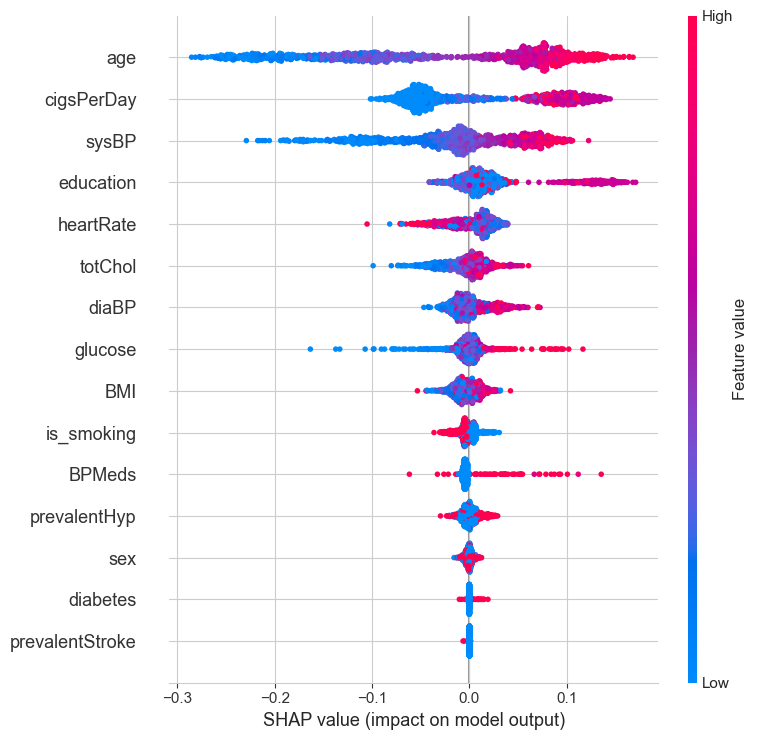

In [63]:
import shap

# Create a TreeExplainer for Random Forest
explainer = shap.TreeExplainer(forest_grid_search.best_estimator_)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP values for a specific instance (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], features=X_test_scaled[0], feature_names=feature_names)

# Plot global feature importance using a beeswarm plot
shap.summary_plot(shap_values[1], features=X_test_scaled, feature_names=feature_names)


# Conclusion